# (Airline Delay Causes)

## By Yasmin Shaaban

## Preliminary Wrangling


## Dataset Information: 

Airport information:

* carrier: Airline code.
* carrier_name: Airline name.
* airport: Airport code.
* airport_name: Airport name.

Airport statistics:

* arr_flights: Number of flights which arrived at the airport.
* arr_del15: Number of flights delayed (>= 15minutes late).
* carrier_ct: Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* weather_ct: Number of flights delayed due to weather.
* nas_ct: Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
* security_ct: Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
* late_aircraft_ct: Number of flights delayed due to a previous flight using the same aircraft being late.
* arr_cancelled: Number of cancelled flights.
* arr_diverted: Number of diverted flights.
* arr_delay: Total time (minutes) of delayed flights.
* carrier_delay: Total time (minutes) of delayed flights due to air carrier.
* weather_delay: Total time (minutes) of delayed flights due to weather.
* nas_delay: Total time (minutes) of delayed flights due to National Aviation System.
* security_delay: Total time (minutes) of delayed flights due to security.
* late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.


In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [34]:
#read dataset
df=pd.read_csv("airline_delay_causes.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30803 entries, 0 to 30802
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 30803 non-null  int64  
 1    month               30803 non-null  int64  
 2   carrier              30803 non-null  object 
 3   carrier_name         30803 non-null  object 
 4   airport              30803 non-null  object 
 5   airport_name         30803 non-null  object 
 6   arr_flights          30746 non-null  float64
 7   arr_del15            30576 non-null  float64
 8   carrier_ct           30746 non-null  float64
 9    weather_ct          30746 non-null  float64
 10  nas_ct               30746 non-null  float64
 11  security_ct          30746 non-null  float64
 12  late_aircraft_ct     30746 non-null  float64
 13  arr_cancelled        30746 non-null  float64
 14  arr_diverted         30746 non-null  float64
 15   arr_delay           30746 non-null 

In [36]:
#shape of dataset
df.shape

(30803, 22)

In [37]:
df.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [38]:
df.describe()


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,30803.000000,30803.000000,30746.000000,30576.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,30746.000000,0.0
mean,2019.320001,5.519430,324.257172,53.690967,15.357155,1.811644,17.051822,0.104382,19.069153,12.999382,0.744455,3646.811097,1161.601477,203.254602,868.559357,5.135725,1408.259936,NaN
std,0.466484,3.355131,932.072538,156.012905,39.427634,6.135674,59.267923,0.491912,59.403870,83.383059,3.389427,11673.296109,3496.684182,809.986527,3644.126540,35.569887,4599.812967,NaN
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.000000,3.000000,36.000000,4.000000,1.360000,0.000000,0.930000,0.000000,0.920000,0.000000,0.000000,216.250000,65.000000,0.000000,24.000000,0.000000,33.000000,NaN
50%,2019.000000,5.000000,87.000000,14.000000,4.570000,0.130000,3.130000,0.000000,4.000000,1.000000,0.000000,807.000000,275.000000,7.000000,117.000000,0.000000,256.000000,NaN
75%,2020.000000,8.000000,213.000000,36.000000,12.240000,1.480000,9.497500,0.000000,12.490000,5.000000,0.000000,2386.000000,868.000000,121.000000,394.000000,0.000000,914.000000,NaN
max,2020.000000,12.000000,21873.000000,3714.000000,966.330000,175.560000,1485.820000,16.800000,1429.550000,4951.000000,115.000000,329847.000000,97970.000000,23749.000000,97283.000000,3194.000000,125086.000000,NaN


In [39]:
df.duplicated().sum()

0

In [40]:
#delete unnamed:21 columns 
del df['Unnamed: 21']

In [41]:
#Get unique values 

print("******Carrier*******")
print(df['carrier'].unique())
print("*********************")
print("******Carrier*******")
print(df['carrier_name'].unique())
print("*********************")
print("******Airport*******")
print(df['airport'].unique())
print("*********************")
print("*********************")
print("******Airport Name*******")
print(df['airport_name'].unique())
print("*********************")
print("*********************")

******Carrier*******
['MQ' 'NK' 'OH' 'OO' 'UA' 'WN' 'YV' 'YX' '9E' 'AA' 'AS' 'B6' 'DL' 'EV'
 'F9' 'G4' 'HA']
*********************
******Carrier*******
['Envoy Air' 'Spirit Air Lines' 'PSA Airlines Inc.'
 'SkyWest Airlines Inc.' 'United Air Lines Inc.' 'Southwest Airlines Co.'
 'Mesa Airlines Inc.' 'Republic Airline' 'Endeavor Air Inc.'
 'American Airlines Inc.' 'Alaska Airlines Inc.' 'JetBlue Airways'
 'Delta Air Lines Inc.' 'ExpressJet Airlines Inc.'
 'Frontier Airlines Inc.' 'Allegiant Air' 'Hawaiian Airlines Inc.'
 'ExpressJet Airlines LLC']
*********************
******Airport*******
['SAV' 'SDF' 'SGF' 'SHV' 'SJT' 'SPI' 'SPS' 'SRQ' 'STL' 'SUX' 'SWO' 'SYR'
 'TLH' 'TOL' 'TUL' 'TVC' 'TXK' 'TYR' 'TYS' 'XNA' 'ACY' 'ATL' 'AVL' 'BDL'
 'BOS' 'BQN' 'BWI' 'CAK' 'CLE' 'CMH' 'DEN' 'DFW' 'DTW' 'EWR' 'FLL' 'GSO'
 'IAG' 'IAH' 'JAX' 'LAS' 'LAX' 'LBE' 'LGA' 'MCI' 'MCO' 'MSP' 'MSY' 'MYR'
 'OAK' 'ORD' 'PBG' 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'RIC' 'RSW' 'SAN' 'SEA'
 'SJU' 'STT' 'TPA' 'ABE' 'AGS' 'ALB' 'AR

In [42]:
# get number of nulls in dataset
df.isnull().sum()

year                     0
 month                   0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights             57
arr_del15              227
carrier_ct              57
 weather_ct             57
nas_ct                  57
security_ct             57
late_aircraft_ct        57
arr_cancelled           57
arr_diverted            57
 arr_delay              57
 carrier_delay          57
weather_delay           57
nas_delay               57
security_delay          57
late_aircraft_delay     57
dtype: int64

In [43]:
#Drop nulls
df.dropna(inplace=True)

In [44]:
# get number of nulls in dataset
df.isnull().sum()

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### The structure of dataset
 30803 rows and 22 columns 
###  The main feature(s) of interest in dataset
  arr_flights , weather_ct,nas_ct,security_ct,arr_flights
  
### The features in the dataset that  help to support investigation into the features of interest
carrier_name,airport_name,year


## Change some columns types from float to int 

In [45]:
#Change some columns types to int 
df['late_aircraft_ct'] = df['late_aircraft_ct'].astype(np.int64)
df['carrier_ct'] = df['carrier_ct'].astype(np.int64)
df['weather_delay'] = df['weather_delay'].astype(np.int64)
df['nas_delay'] = df['nas_delay'].astype(np.int64)
df['late_aircraft_delay'] = df['late_aircraft_delay'].astype(np.int64)
df['arr_del15'] = df['arr_del15'].astype(np.int64)
df['late_aircraft_delay'] = df['nas_delay'].astype(np.int64)
df['arr_cancelled'] = df['arr_cancelled'].astype(np.int64)
df[' weather_ct'] = df[' weather_ct'].astype(np.int64)
df['nas_ct'] = df['nas_ct'].astype(np.int64)
df['arr_flights'] = df['arr_flights'].astype(np.int64)
df['arr_diverted'] = df['arr_diverted'].astype(np.int64)
df['late_aircraft_delay'] = df['late_aircraft_delay'].astype(np.int64)
df['security_ct'] = df['security_ct'].astype(np.int64)
df['security_delay'] = df['security_delay'].astype(np.int64)
df[' carrier_delay'] = df[' carrier_delay'].astype(np.int64)
df[' arr_delay'] = df[' arr_delay'].astype(np.int64)



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30576 entries, 0 to 30802
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 30576 non-null  int64 
 1    month               30576 non-null  int64 
 2   carrier              30576 non-null  object
 3   carrier_name         30576 non-null  object
 4   airport              30576 non-null  object
 5   airport_name         30576 non-null  object
 6   arr_flights          30576 non-null  int64 
 7   arr_del15            30576 non-null  int64 
 8   carrier_ct           30576 non-null  int64 
 9    weather_ct          30576 non-null  int64 
 10  nas_ct               30576 non-null  int64 
 11  security_ct          30576 non-null  int64 
 12  late_aircraft_ct     30576 non-null  int64 
 13  arr_cancelled        30576 non-null  int64 
 14  arr_diverted         30576 non-null  int64 
 15   arr_delay           30576 non-null  int64 
 16   car

## Univariate Exploration

In [47]:
#copy df into df_clean 
df_clean=df

### Visualization 1
### Distribution of number of arrived in the airport 

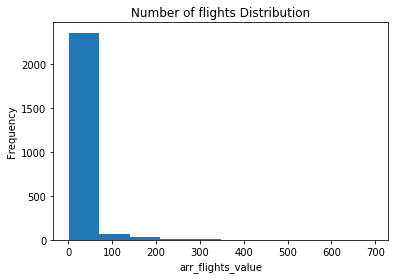

In [48]:
#Histogram of number of flights
df_clean['arr_flights'].value_counts().plot(kind='hist')
plt.xlabel("arr_flights_value")
plt.title('Number of flights Distribution')
plt.show()

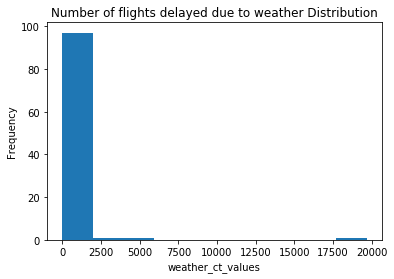

In [49]:
#Histogram number of flights due to weather 
df_clean[' weather_ct'].value_counts().plot(kind='hist')
plt.title("Number of flights delayed due to weather Distribution")
plt.xlabel("weather_ct_values")
plt.show()

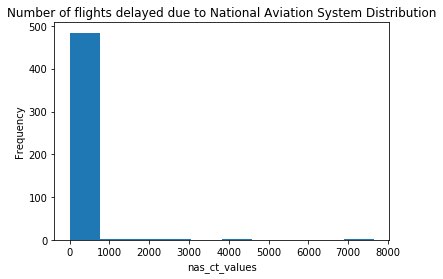

In [50]:
#Histogram number of flights due to NAS 
df_clean['nas_ct'].value_counts().plot(kind='hist')
plt.title("Number of flights delayed due to National Aviation System Distribution")
plt.xlabel("nas_ct_values")
plt.show()

### Visualization 2 
### Bar plot to show counts of airline carriers used 

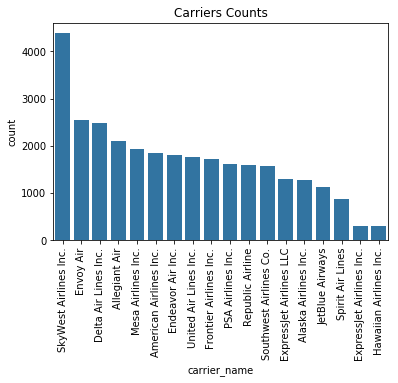

In [51]:
#Carrier bar chart
base_color=sb.color_palette()[0]
carrier_order = df_clean['carrier_name'].value_counts().index
sb.countplot(data=df_clean,x='carrier_name',color=base_color,order=carrier_order)
plt.title("Carriers Counts")
plt.xticks(rotation = 90)
plt.show()

###  The distribution of variables of interest.
Left Skewed distribution of number of flights , number of flights delayed due to weather and number of flights delayed due to National Aviation System
There are outliers in weather ct between 17500 and 20000

### Skywest is a North American regional airline  , it is the most used


## Bivariate Exploration

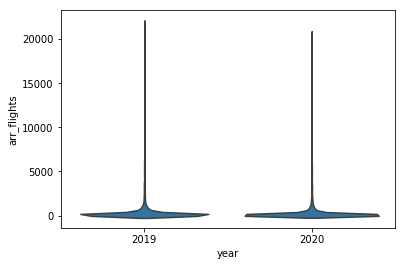

In [52]:
#Violin plot between year and flights 
sb.violinplot(data=df_clean,x='year',y='arr_flights',color=base_color,inner=None)
plt.show()

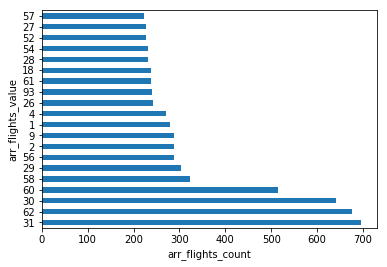

In [53]:
#See sample of values of air flights 
df_clean['arr_flights'].value_counts().head(20).plot(kind='barh')
plt.xlabel('arr_flights_count')
plt.ylabel('arr_flights_value')
plt.show()

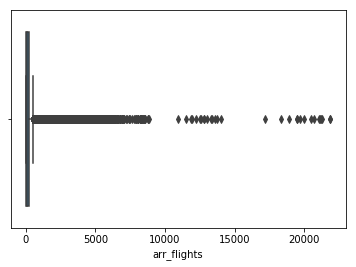

In [54]:
#Detect outliers 
sb.boxplot(data=df,x='arr_flights',color=base_color)
plt.show()

In [55]:
#Get number of flight less than 1000 to remove outliers
df_clean=df_clean.query("arr_flights<1000")

In [56]:
df_clean.shape

(28578, 21)

### Visualization 3
### Violin plot between year and number of flights 

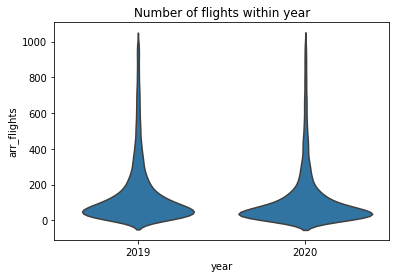

In [57]:
#Violin plot between year and number of flights 
sb.violinplot(data=df_clean,x='year',y='arr_flights',color=base_color,inner=None)
plt.title("Number of flights within year")
plt.show()

## I  think that number of flights in 2019  will be less than that in 2020 because of COVID19 but superizingly flights in 2020 tend to be more 

### Visualization 4
### Violin plot which shows the relation between number of flights with respect to number of flights delayed due to weather in 2019 and 2020 year

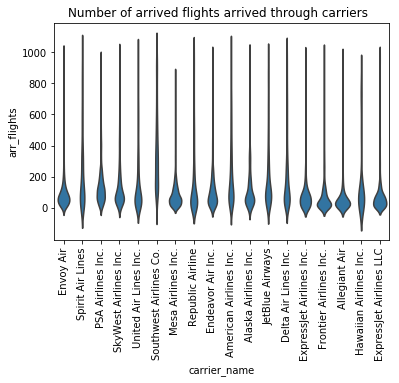

In [58]:
yticks=np.arange(0,1000+200,200)
sb.violinplot(data=df_clean,x='carrier_name',y='arr_flights',color=base_color,inner=None)
plt.title("Number of arrived flights arrived through carriers  ")
plt.xticks(rotation = 90)
plt.yticks(yticks)
plt.show()

### Allegiant Air is an American low-cost airline, it shows the largest number of arrived flights

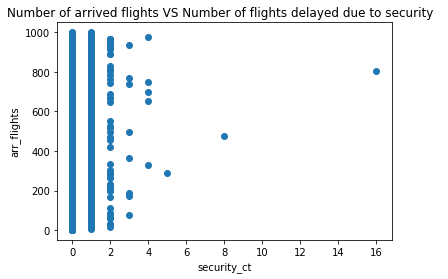

In [59]:
plt.scatter(data = df_clean, x = 'security_ct', y = 'arr_flights')
plt.title("Number of arrived flights VS Number of flights delayed due to security  ")
plt.xlabel('security_ct')
plt.ylabel('arr_flights')
plt.show()

It seems it is slightly positive correlation between number of flights delayed due to security , this can be because when there is care about security number of flights arrived increases 

### Interesting insights

 I  think that number of flights in 2019  will be less than that in 2020 because of COVID19 but surprizingly flights in 2020 tend to be more 
 Allegiant Air is an American low-cost airline shows the largest number of flights
 
 

## Multivariate Exploration

In [60]:
df_clean.shape

(28578, 21)

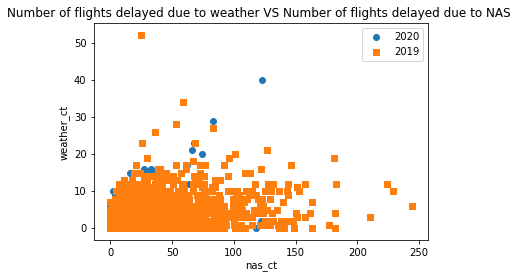

In [61]:
year_markers = [[2020, 'o'],
               [2019, 's']]

for year, marker in year_markers:
    df_temp = df_clean[df_clean['year'] ==year ]
    plt.scatter(data = df_temp, x = 'nas_ct', y = ' weather_ct', marker = marker)
plt.legend(['2020','2019'])
plt.xlabel('nas_ct')
plt.ylabel('weather_ct')
plt.title('Number of flights delayed due to weather VS Number of flights delayed due to NAS ')
plt.show()

### Visualization 5
### Scatter plot which shows the relation between number of flights with respect to number of flights delayed due to weather in 2019 and 2020 year

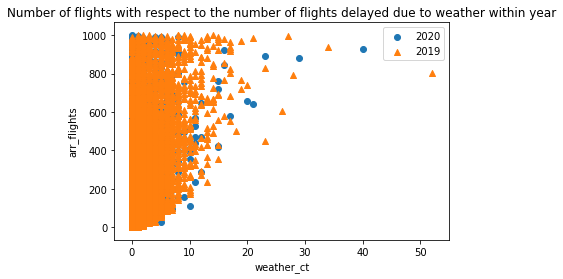

In [31]:
year_markers = [[2020, 'o'],
               [2019, '^']]

for year, marker in year_markers:
    df_temp = df_clean[df_clean['year'] ==year ]
    plt.scatter(data = df_temp, x = ' weather_ct', y = 'arr_flights', marker = marker)
plt.legend(['2020','2019'])
plt.title('Number of flights with respect to the number of flights delayed due to weather within year')
plt.xlabel('weather_ct')
plt.ylabel('arr_flights')
plt.show()

###  I want to see the relationship between number of flights delayed due to weather and number of flights delayed due to National Aviation System it seems it is a positive correlation in both year 2019 and 2020

### The relationships between features 
it seems it is a positive correlation in both year 2019 and 2020 between weather_ct and nas_ct 
it seems it is a positive correlation in both year 2019 and 2020 between number of flights and weather_ct 

###  Interesting interactions between features
it is interseting  that the relation between arr_flights and weather_ct is positive correlation ,number of flights delayed due to weather is positive correlated with the number of flights arrived  this can be because when there is care about weather circumstances and care of  national aviation  system , number of flights increases

In [32]:
!jupyter nbconvert Project3.ipynb --to slides  --template output_toggle

[NbConvertApp] Converting notebook Project3.ipynb to slides
[NbConvertApp] Writing 442696 bytes to Project3.slides.html
